<a href="https://colab.research.google.com/github/Rounak-Das-02/DogsVsCats_withVGG/blob/main/18_hours_ago_Training_Model_with_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/laxmimerit/dog-cat-full-dataset.git // Cats and Dogs Dataset

Cloning into 'dog-cat-full-dataset'...
remote: Enumerating objects: 25027, done.
remote: Total 25027 (delta 0), reused 0 (delta 0), pack-reused 25027
Receiving objects: 100% (25027/25027), 541.62 MiB | 20.83 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Checking out files: 100% (25001/25001), done.


In [3]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image

# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = r'/content/dog-cat-full-dataset/data/train'
valid_path = r'/content/dog-cat-full-dataset/data/test'

# add preprocessing layer to the front of VGG
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
  layer.trainable = False
  

In [4]:
# our layers - you can add more if you want
x = Flatten()(vgg.output)
# x = Dense(1000, activation='relu')(x)
prediction = Dense(2, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)



Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [5]:

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'/content/dog-cat-full-dataset/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'/content/dog-cat-full-dataset/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')


Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [6]:
# fit the model
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=5,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
625/625 [==============================] - 360s 576ms/step - loss: 0.2835 - accuracy: 0.8809 - val_loss: 0.2461 - val_accuracy: 0.9082
Epoch 2/5
625/625 [==============================] - 354s 566ms/step - loss: 0.2119 - accuracy: 0.9183 - val_loss: 0.3144 - val_accuracy: 0.8928
Epoch 3/5
625/625 [==============================] - 350s 561ms/step - loss: 0.2105 - accuracy: 0.9240 - val_loss: 0.2122 - val_accuracy: 0.9262
Epoch 4/5
625/625 [==============================] - 350s 559ms/step - loss: 0.1941 - accuracy: 0.9286 - val_loss: 0.2092 - val_accuracy: 0.9324
Epoch 5/5
625/625 [==============================] - 351s 561ms/step - loss: 0.1903 - accuracy: 0.9325 - val_loss: 0.2026 - val_accuracy: 0.9348


In [8]:
import tensorflow as tf
from keras.models import load_model

In [9]:
model.save("Cats_Dogs_model.h5")

In [30]:
model = load_model("/content/Cats_Dogs_model.h5")
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [54]:
'''=================================================================================================
                            Loading the model and Predicting the output'''

'================================================================================================='

In [40]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from keras_preprocessing import image

image_path = "/content/11908.jpg"

img = image.load_img( image_path , target_size=(224,224))
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img.shape

(1, 224, 224, 3)

In [45]:
predict = model.predict([img])

(375, 500, 3)


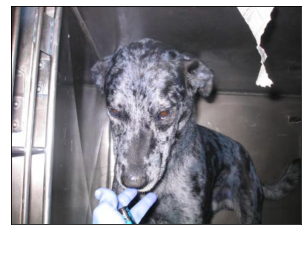

In [75]:
img1 = cv2.imread("/content/11908.jpg")
plt.imshow(img1)

plt.xticks([])
plt.yticks([])



font = {'family': 'serif',
        'color':  'white',
        'weight': 'medium',
        'size': 20,
        }



if predict[0][0] == 1 :
  plt.xlabel("Cat" , fontdict = font)

if predict[0][1] == 1 :
  plt.xlabel("Dog" , fontdict = font) 


plt.show()